In [68]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import mean_squared_error

## Task 1

In [69]:
# The training data
dfTrainData = pd.read_csv("./../TrainData.csv")
dfSolution = pd.read_csv("./../Solution.csv")
dfWFI= pd.read_csv("./../WeatherForecastInput.csv")
dfTrainData

,TIMESTAMP,POWER,U10,V10,WS10,U100,V100,WS100
0,20120101 1:00,0.273678,0.534894,-3.660243,3.699120,0.765355,-4.486657,4.551468
1,20120101 2:00,0.086796,0.330813,-2.676430,2.696797,0.469875,-3.213752,3.247920
2,20120101 3:00,0.006811,-0.065839,-2.029072,2.030140,-0.020893,-2.418119,2.418209
3,20120101 4:00,0.018646,-0.419549,-1.799090,1.847362,-0.444867,-2.149654,2.195203
4,20120101 5:00,0.034812,-0.754224,-1.661526,1.824698,-0.838274,-1.991829,2.161038
...,...,...,...,...,...,...,...,...
16075,20131031 20:00,0.101254,-1.459917,-1.778960,2.301316,-1.974368,-4.936280,5.316483
16076,20131031 21:00,0.105047,-1.293326,-2.350447,2.682777,-0.781394,-4.903565,4.965433
16077,20131031 22:00,0.145079,-0.308284,-2.441885,2.461269,0.257905,-4.027432,4.035681
16078,20131031 23:00,0.180933,1.148765,-2.789011,3.016330,1.628004,-3.520358,3.878572


In [70]:
# Limit use of wind speed at 10m above ground level
dfTrainData = dfTrainData.drop(columns=['U10', 'V10', 'U100', 'V100', 'WS100'])
dfWFI = dfWFI.drop(columns=['U10', 'V10', 'U100', 'V100', 'WS100'])

# Extract features and target variable
X_train = dfTrainData[['WS10']]  
y_train = dfTrainData['POWER']  

# Predict the wind power production for the whole month 11.2013 based on the weather data in WeatherForecastInput.csv
X_test = dfWFI[['WS10']]

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Root mean squared error (RMSE): 0.21638408562354403


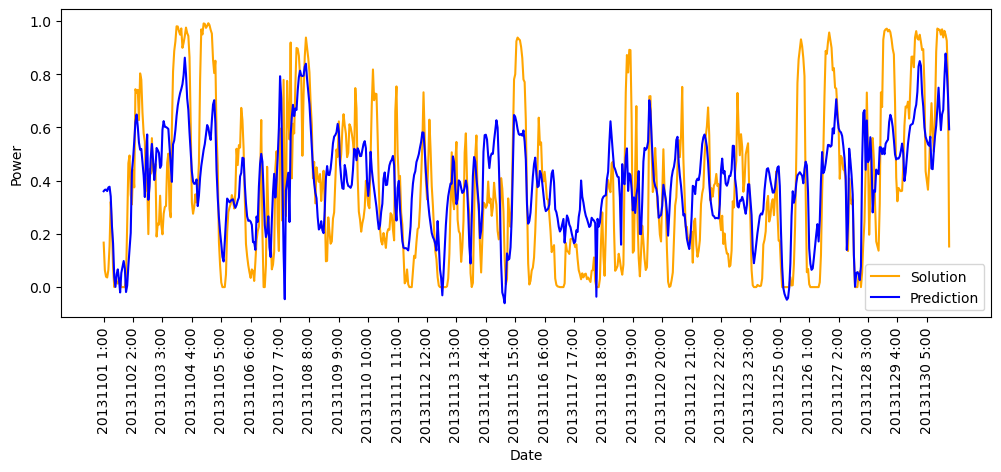

In [71]:
""" Linear Regression """
# Train the linear regression model
LR_model = LinearRegression()
LR_model.fit(X_train, y_train)

# Prediction
LR_y_pred = LR_model.predict(X_test)

# Evaluation of the model
print('Root mean squared error (RMSE):', np.sqrt(mean_squared_error(dfSolution['POWER'], LR_y_pred)))

# Plotting
plt.figure(figsize=(12, 4))
plt.plot(dfWFI['TIMESTAMP'], dfSolution['POWER'], label='Solution', color='orange')
plt.plot(dfWFI['TIMESTAMP'], LR_y_pred, label='Prediction', color='b')
plt.xlabel('Date')
plt.ylabel('Power')
plt.xticks(dfWFI['TIMESTAMP'][::25],  rotation='vertical')
plt.legend()
plt.show()

Root mean squared error (RMSE): 0.25201515123405976


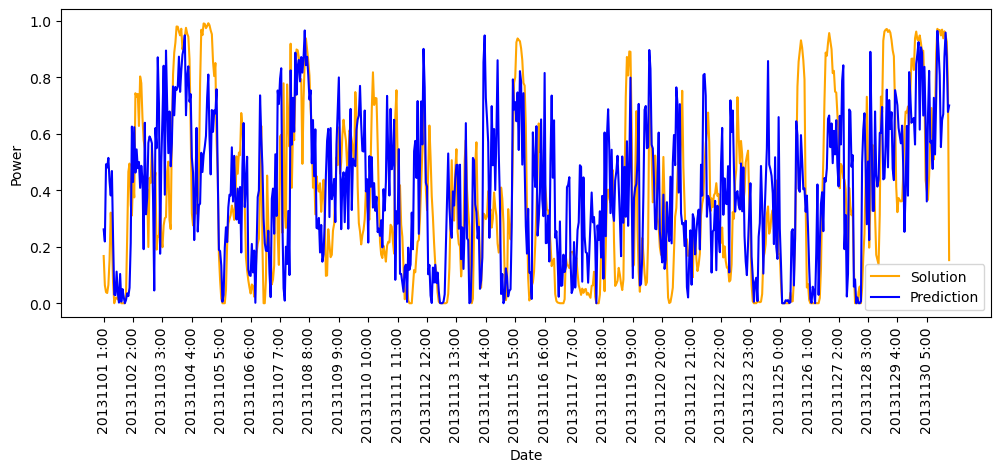

In [72]:
""" K-Nearest Neighbors """
# Train kNN model
kNN_model = KNeighborsRegressor(n_neighbors=3)
kNN_model.fit(X_train, y_train)

# Prediction
kNN_y_pred = kNN_model.predict(X_test)

# Evaluation of the model
print('Root mean squared error (RMSE):', np.sqrt(mean_squared_error(dfSolution['POWER'], kNN_y_pred)))

# Plotting
plt.figure(figsize=(12, 4))
plt.plot(dfWFI['TIMESTAMP'], dfSolution['POWER'], label='Solution', color='orange')
plt.plot(dfWFI['TIMESTAMP'], kNN_y_pred, label='Prediction', color='b')
plt.xlabel('Date')
plt.ylabel('Power')
plt.xticks(dfWFI['TIMESTAMP'][::25],  rotation='vertical')
plt.legend()
plt.show()

In [73]:
""" Supported Vector Regression """
# Extract features and target variable
X_train = dfTrainData['WS10'].values.reshape(-1, 1)
y_train = dfTrainData['POWER']

# Predict the wind power production for the whole month 11.2013 based on the weather data in WeatherForecastInput.csv
X_test = dfWFI['WS10'].values.reshape(-1, 1)

# Train the SVR model
SVRlinear_model = SVR(kernel='linear', gamma='scale', C=1.0, epsilon=0.1)
SVRlinear_model.fit(X_train, y_train)

SVRrbf_model = SVR(kernel='rbf', gamma='scale', C=1.0, epsilon=0.1)
SVRrbf_model.fit(X_train, y_train)

# Prediction
SVRlinear_y_pred = SVRlinear_model.predict(X_test)
SVRrbf_y_pred = SVRrbf_model.predict(X_test)

# Evaluate the model
print('Root mean squared error (RMSE):', np.sqrt(mean_squared_error(dfSolution['POWER'], SVRlinear_y_pred)))
print('Root mean squared error (RMSE):', np.sqrt(mean_squared_error(dfSolution['POWER'], SVRrbf_y_pred)))

Root mean squared error (RMSE): 0.2149098187240887
Root mean squared error (RMSE): 0.213743597465898


Root mean squared error (RMSE): 0.21574298154559574


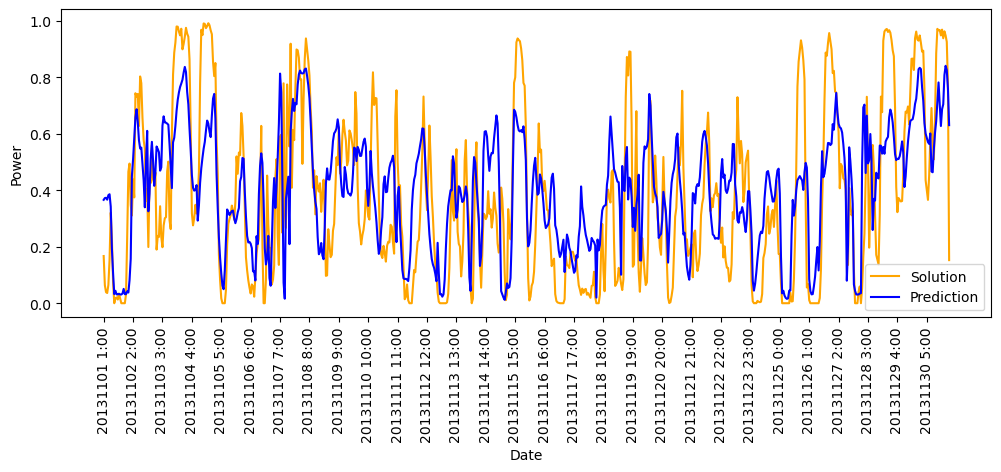

In [74]:
""" Artificial Neural Networks (ANN) """
# Train the ANN model
ANN_model = MLPRegressor(hidden_layer_sizes=(100,100), max_iter=10000, activation='relu', random_state=42)
ANN_model.fit(X_train, y_train)

# Prediction
ANN_y_pred = ANN_model .predict(X_test)

# Evaluate the model
print('Root mean squared error (RMSE):', np.sqrt(mean_squared_error(dfSolution['POWER'], ANN_y_pred)))

# Plotting
plt.figure(figsize=(12, 4))
plt.plot(dfWFI['TIMESTAMP'], dfSolution['POWER'], label='Solution', color='orange')
plt.plot(dfWFI['TIMESTAMP'], ANN_y_pred, label='Prediction', color='b')
plt.xlabel('Date')
plt.ylabel('Power')
plt.xticks(dfWFI['TIMESTAMP'][::25],  rotation='vertical')
plt.legend()
plt.show()

In [66]:
# Save in ForecastTemplate1-LR.csv for the linear regression model
LR_pred_df = pd.DataFrame({'TIMESTAMP': dfWFI['TIMESTAMP'], 'POWER': LR_y_pred})
LR_pred_df.to_csv('./../ForecastTemplate/ForecastTemplate1-LR.csv', index=False)

# Save in ForecastTemplate1-kNN.csv for the k-nearest neighbor model
kNN_pred_df = pd.DataFrame({'TIMESTAMP': dfWFI['TIMESTAMP'], 'POWER': kNN_y_pred})
kNN_pred_df.to_csv('./../ForecastTemplate/ForecastTemplate1-kNN.csv', index=False)

# Save in ForecastTemplate3-SVR.csv for the supported vector regression model
SVR_pred_df = pd.DataFrame({'TIMESTAMP': dfWFI['TIMESTAMP'], 'POWER': SVRrbf_y_pred})
SVR_pred_df.to_csv('./../ForecastTemplate/ForecastTemplate1-SVR.csv', index=False)

# Save in ForecastTemplate3-ANN.csv for the artificial neural network model
ANN_pred_df = pd.DataFrame({'TIMESTAMP': dfWFI['TIMESTAMP'], 'POWER': ANN_y_pred})
ANN_pred_df.to_csv('./../ForecastTemplate/ForecastTemplate1-ANN.csv', index=False)

In [65]:
# Evaluate the prediction accuracy
# Compare the predicted wind power and the true wind power measurements (in the file Solution.csv)
# Use the error metric RMSE to evaluate and compare the prediction accuracy among the machine learning approaches

# Linear regression
print('RMSE for Linear Regression:', np.sqrt(mean_squared_error(dfSolution['POWER'], LR_y_pred)))

# K-Nearest Neighbors
print('\nRMSE for k-Nearest Neighbors:', np.sqrt(mean_squared_error(dfSolution['POWER'], kNN_y_pred)))

# Support Vector Regression
print('\nRMSE for linear SVM:', np.sqrt(mean_squared_error(dfSolution['POWER'], SVRlinear_y_pred)))
print('RMSE for rbf SVM:', np.sqrt(mean_squared_error(dfSolution['POWER'], SVRrbf_y_pred)))

# Artificial Neural Network
print('\nRMSE for Artificial Neural Network:', np.sqrt(mean_squared_error(dfSolution['POWER'], ANN_y_pred)))

RMSE for Linear Regression: 0.21638408562354403

RMSE for k-Nearest Neighbors: 0.25201515123405976

RMSE for linear SVM: 0.2149098187240887
RMSE for rbf SVM: 0.213743597465898

RMSE for Artificial Neural Network: 0.21574298154559574
